#                                    EMPLOYEE ATTRITION PREDICTION

### Importing Libraries

In [31]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import chart_studio.plotly as py 

from imblearn.over_sampling import SMOTE
from scipy import stats

from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [32]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission_format = pd.read_csv('Sample_submission.csv')

In [33]:
train.columns

Index(['Id', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour'],
      dtype='object')

In [34]:
bool_series = train['EmployeeNumber'].duplicated()
train = train[~bool_series]

In [35]:
#Label Encoding Categorical Features

for col in train.columns:
    if(isinstance(train[col][0],str)):
        train[col] = LabelEncoder().fit_transform(train[col])
        
for col in test.columns:
    if(isinstance(test[col][0],str)):
        test[col] = LabelEncoder().fit_transform(test[col])

## EXPLORATORY DATA ANALYSIS

In [36]:
train.shape

(1000, 29)

In [37]:
train.describe()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,500.500000,36.883000,0.157000,1.617000,1.263000,9.145000,2.912000,2.250000,1020.605000,2.728000,...,3.153000,0.791000,11.229000,2.841000,6.979000,4.225000,2.152000,4.058000,3.041000,1.0
std,288.819436,9.125052,0.363983,0.648638,0.533024,8.120956,1.028257,1.311953,606.009713,1.095087,...,0.360168,0.850907,7.766652,1.300542,6.232608,3.698115,3.199865,3.598831,1.413973,0.0
min,1.000000,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,250.750000,30.000000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,491.000000,2.000000,...,3.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000,1.0
50%,500.500000,36.000000,0.000000,2.000000,1.000000,7.000000,3.000000,2.000000,1008.000000,3.000000,...,3.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000,1.0
75%,750.250000,43.000000,0.000000,2.000000,2.000000,13.000000,4.000000,3.000000,1569.750000,4.000000,...,3.000000,1.000000,15.000000,3.000000,9.000000,7.000000,2.000000,7.000000,4.000000,1.0
max,1000.000000,60.000000,1.000000,2.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,...,4.000000,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0


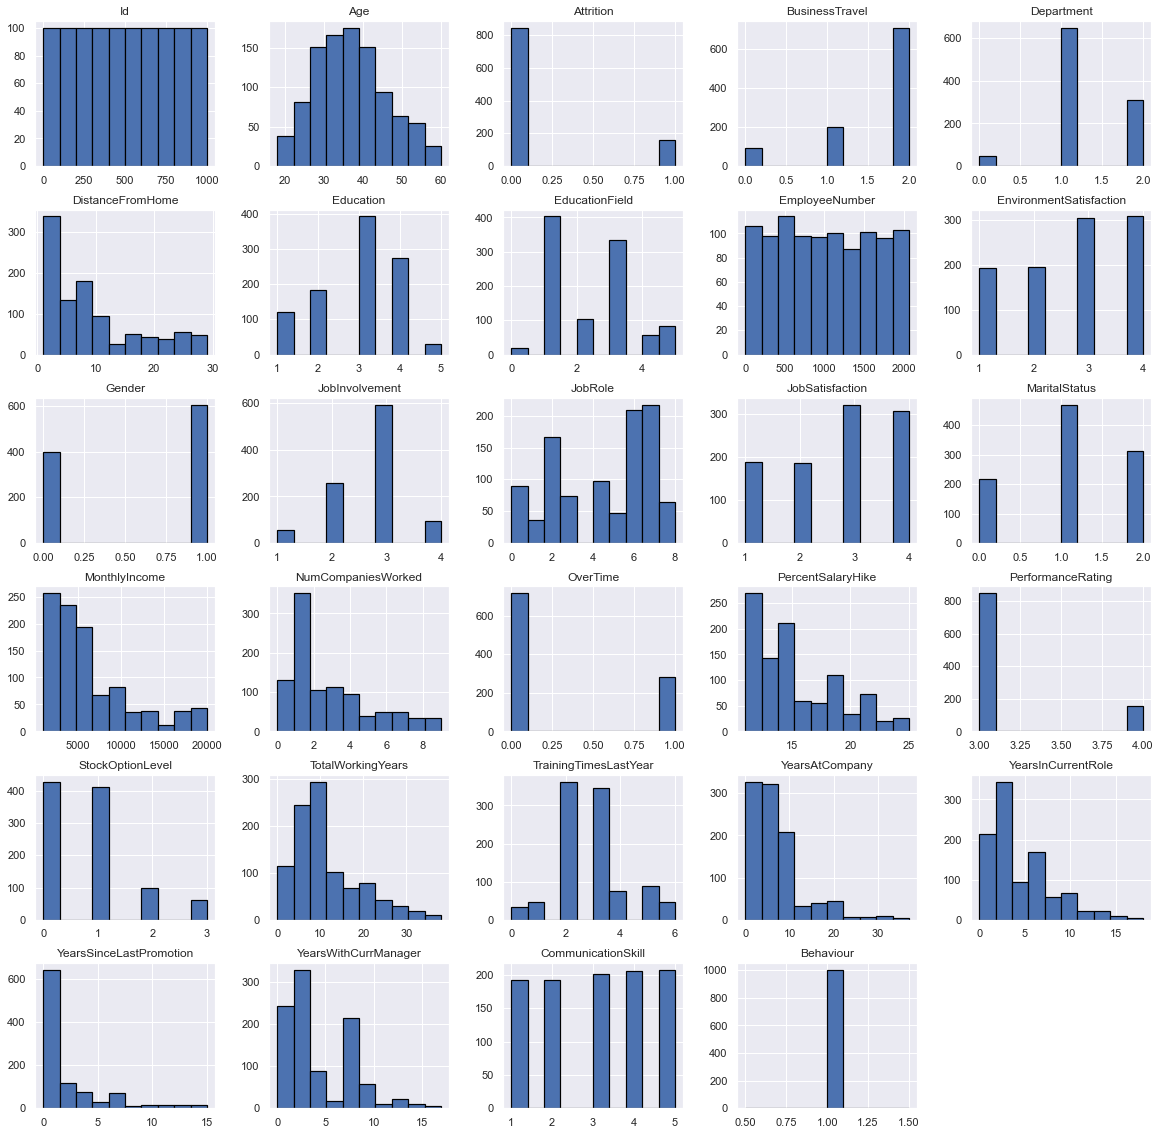

In [38]:
# Visulazing the distibution of the data for every feature
sns.set(font_scale=1)
train.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

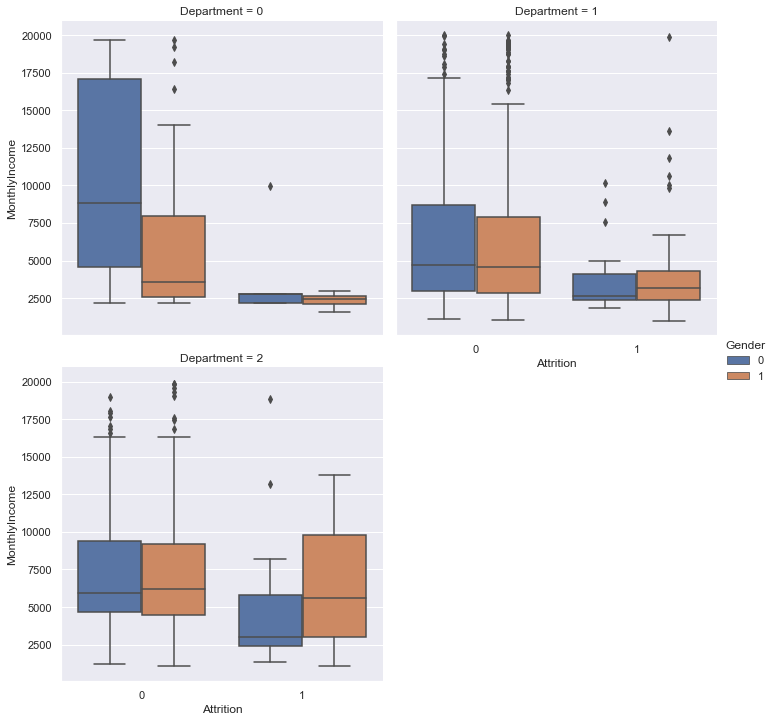

In [39]:
sns.catplot(x =   'Attrition',     
               y =   'MonthlyIncome',      
               hue = 'Gender',   
               col = 'Department',
               col_wrap=2,           
               kind = 'box',
               data = train)
plt.show()

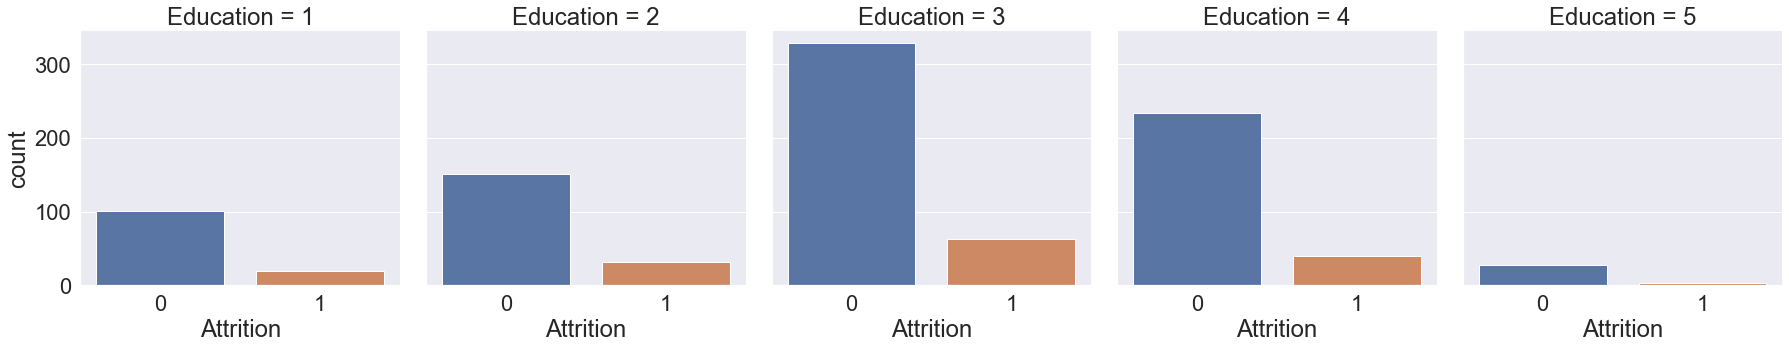

In [40]:
sns.set(font_scale=2)
sns.catplot(data=train,kind='count',x='Attrition',col='Education')

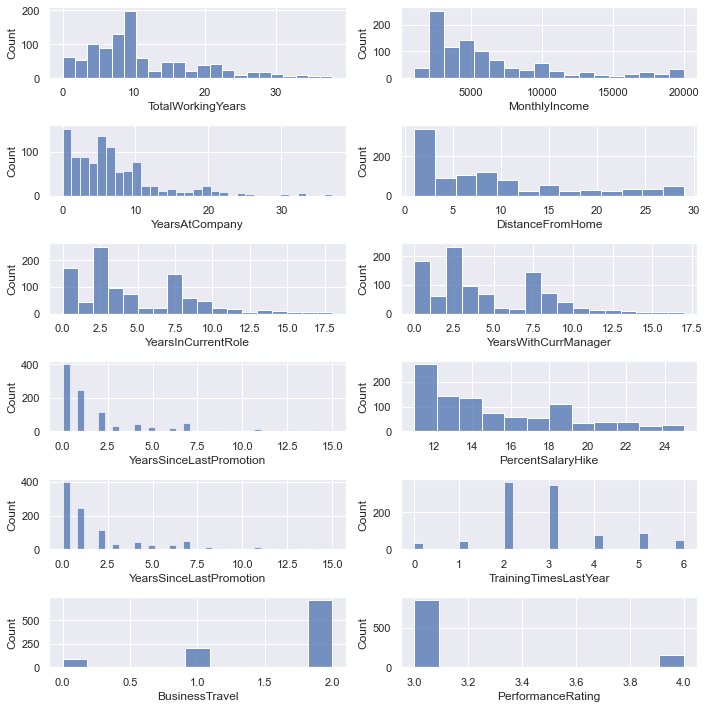

In [41]:
sns.set(font_scale=1)
fig,ax = plt.subplots(6,2, figsize=(10,10))                
sns.histplot(train['TotalWorkingYears'], ax = ax[0,0]) 
sns.histplot(train['MonthlyIncome'], ax = ax[0,1]) 
sns.histplot(train['YearsAtCompany'], ax = ax[1,0]) 
sns.histplot(train['DistanceFromHome'], ax = ax[1,1]) 
sns.histplot(train['YearsInCurrentRole'], ax = ax[2,0]) 
sns.histplot(train['YearsWithCurrManager'], ax = ax[2,1]) 
sns.histplot(train['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.histplot(train['PercentSalaryHike'], ax = ax[3,1]) 
sns.histplot(train['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.histplot(train['TrainingTimesLastYear'], ax = ax[4,1]) 
sns.histplot(train['BusinessTravel'], ax = ax[5,0]) 
sns.histplot(train['PerformanceRating'], ax = ax[5,1]) 
plt.tight_layout()
plt.show()

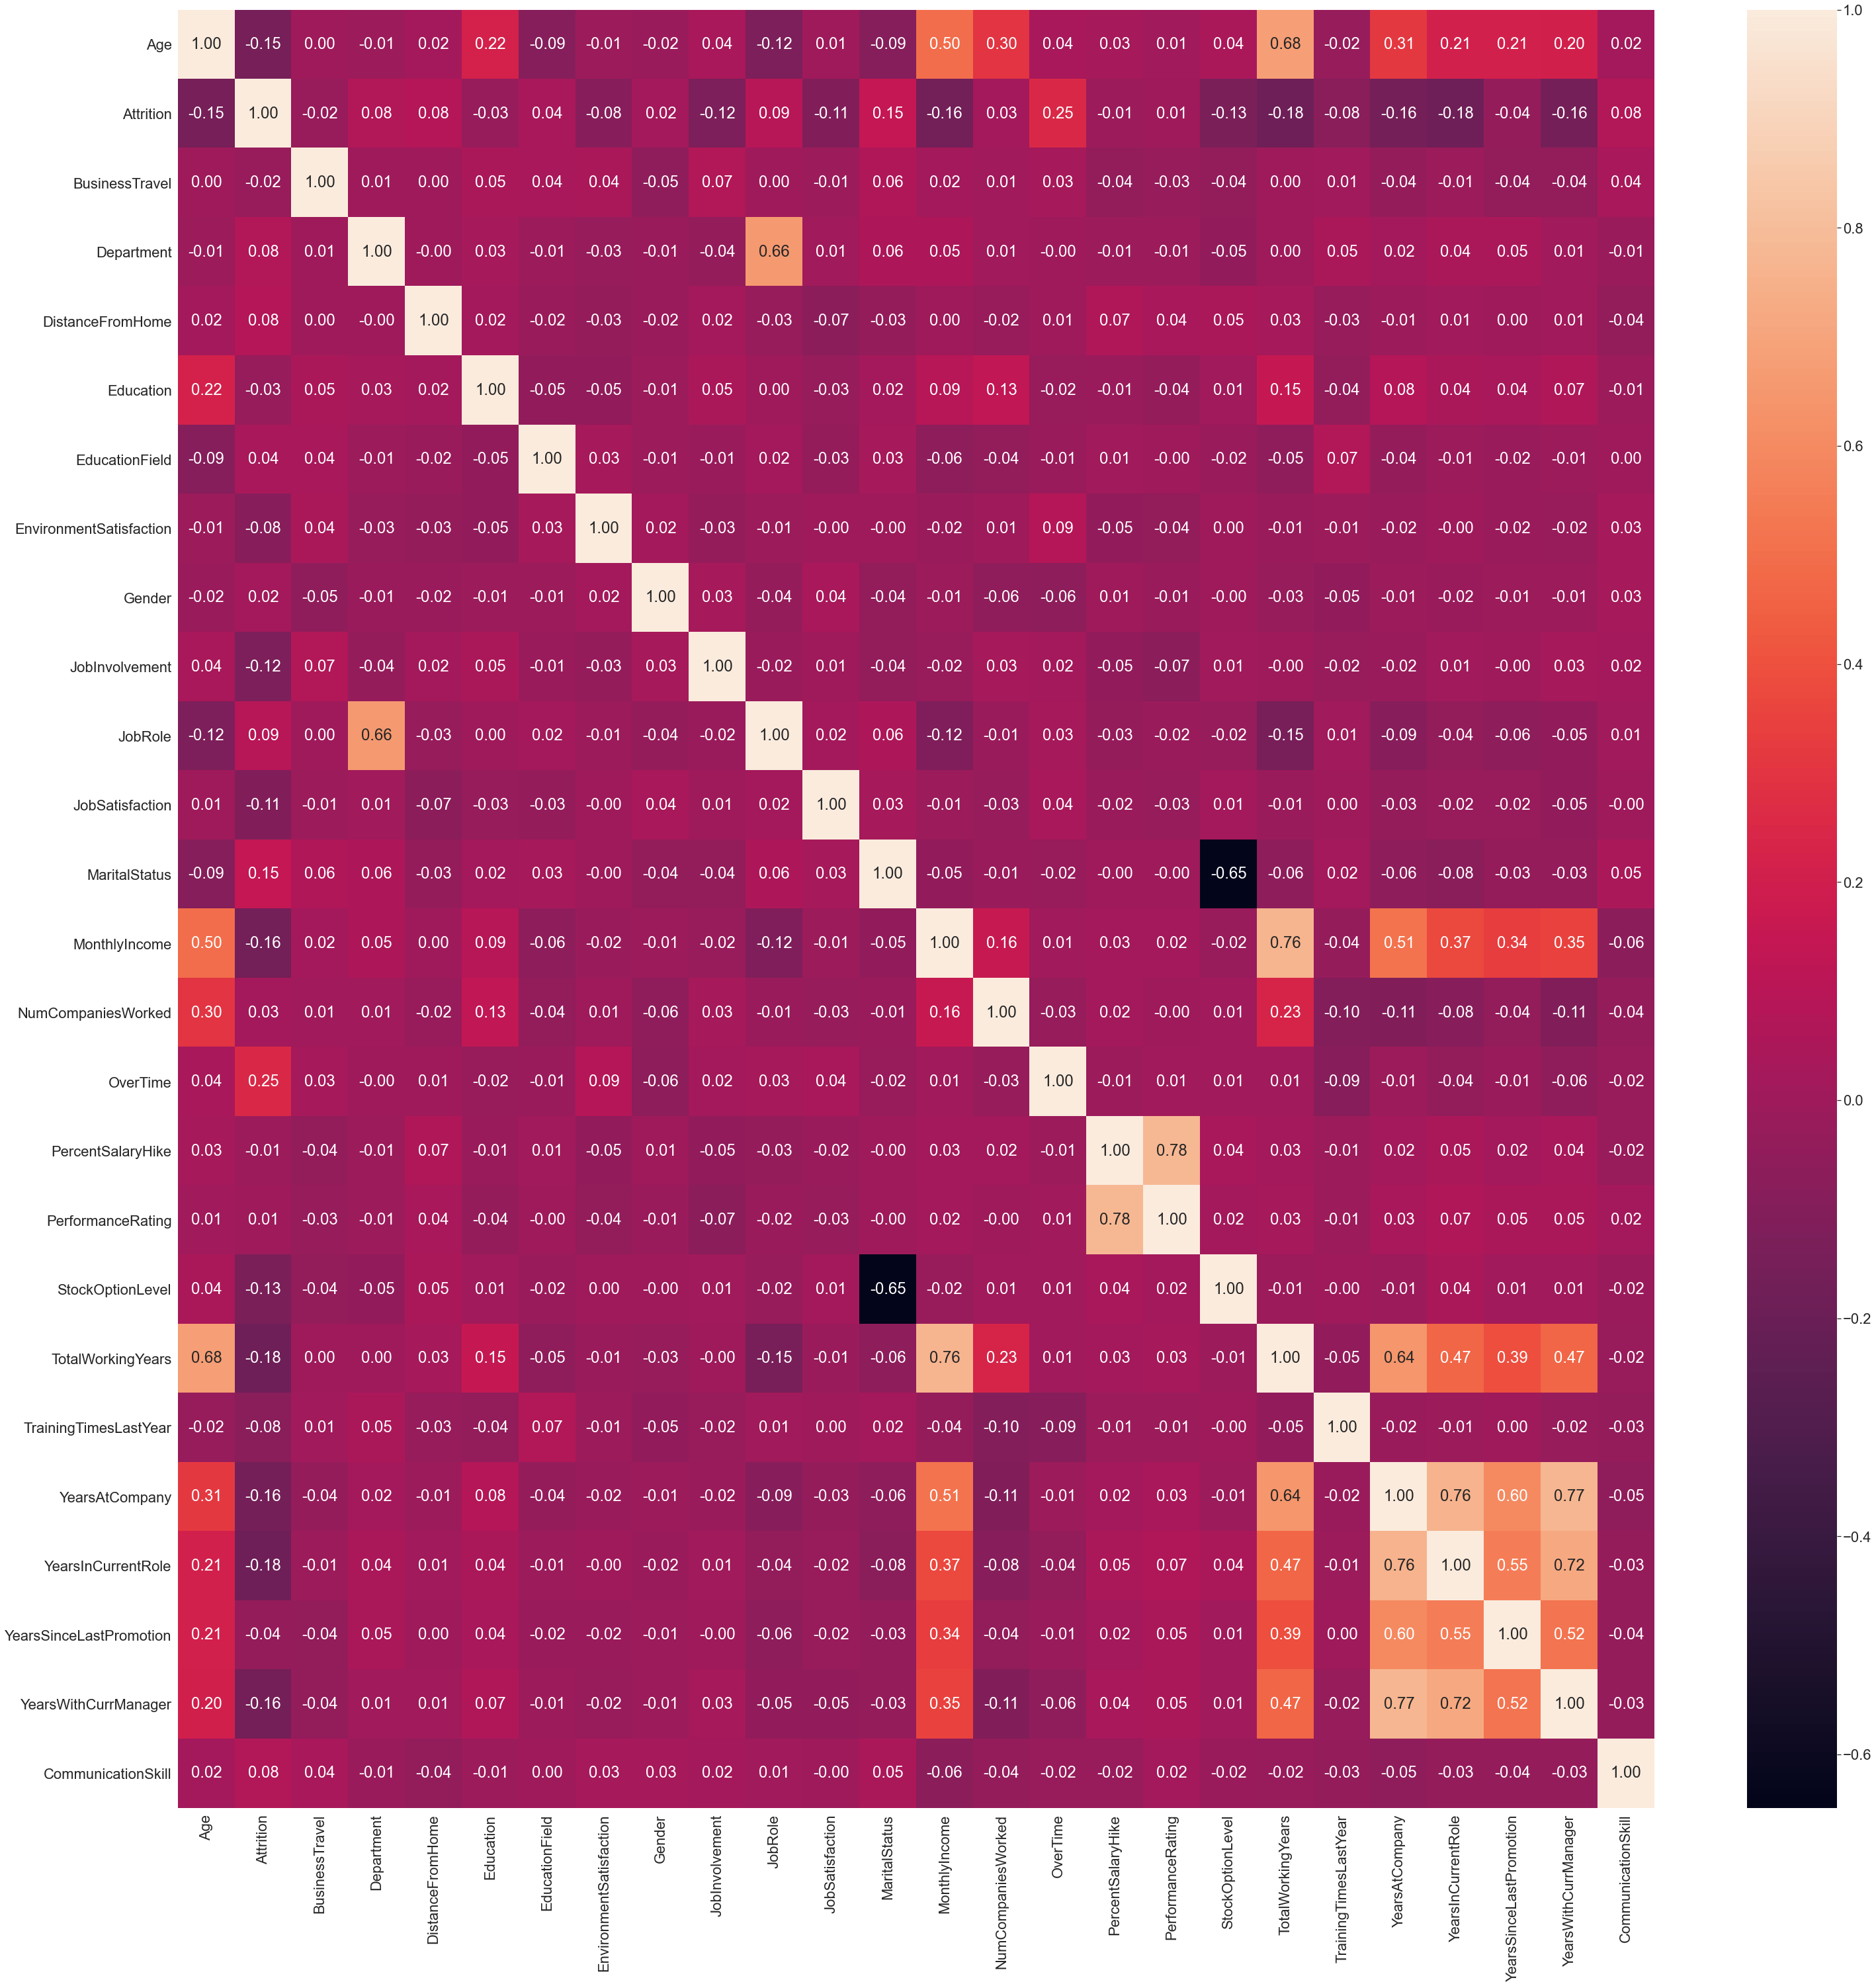

In [42]:
train = train.drop(['Id','EmployeeNumber'],axis = 1)
corr = train.drop('Behaviour',axis=1).corr()
sns.set(font_scale=2)
sns.heatmap(corr,annot=True, fmt='.2f')
plt.rcParams['figure.figsize'] = (50,50)

In [16]:
train.skew()

Age                        0.376387
Attrition                  1.888481
BusinessTravel            -1.454992
Department                 0.138197
DistanceFromHome           1.008337
Education                 -0.321484
EducationField             0.504022
EnvironmentSatisfaction   -0.325588
Gender                    -0.425941
JobInvolvement            -0.494499
JobRole                   -0.378787
JobSatisfaction           -0.364461
MaritalStatus             -0.148074
MonthlyIncome              1.374174
NumCompaniesWorked         1.030069
OverTime                   0.959445
PercentSalaryHike          0.835923
PerformanceRating          1.930742
StockOptionLevel           0.999030
TotalWorkingYears          1.096542
TrainingTimesLastYear      0.567682
YearsAtCompany             1.783427
YearsInCurrentRole         0.965682
YearsSinceLastPromotion    2.048824
YearsWithCurrManager       0.905783
CommunicationSkill        -0.042838
Behaviour                  0.000000
dtype: float64

In [17]:
#Remove Train Skew
X = train.drop('Attrition',axis=1)

for col in X.columns:
    X[col] = np.cbrt(X[col])
    
Y = train['Attrition']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=1)

In [18]:
#Remove Test Skew
Id = test["Id"]
test = test.drop(['Id','EmployeeNumber'],axis = 1)

for col in test.columns:
    test[col] = np.cbrt(test[col])

In [20]:
#Feature Scaling

std_scaler = StandardScaler()
sc_train = std_scaler.fit_transform(X)
sc_test = std_scaler.transform(test)

X = pd.DataFrame(sc_train, index=train.index, columns=X.columns)
test = pd.DataFrame(sc_test, index=test.index, columns=test.columns)

In [21]:
#Oversampling the minority class

sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(X, Y)

X.shape

(1686, 26)

# HYPERPARAMETER TUNING

In [22]:
'''
rf = RandomForestClassifier()
parameters = {
     "max_depth"        : [16, 21, 24],
     "criterion"        : ['gini', 'entropy'],
     "min_samples_split" : [5, 10, 15],
    #"n_estimators"     : [100, 350, 600]
     }

grid = GridSearchCV(rf, parameters, n_jobs=4, scoring="roc_auc", cv=10)

grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_params_)
'''

'\nrf = RandomForestClassifier()\nparameters = {\n     "max_depth"        : [16, 21, 24],\n     "criterion"        : [\'gini\', \'entropy\'],\n     "min_samples_split" : [5, 10, 15],\n    #"n_estimators"     : [100, 350, 600]\n     }\n\ngrid = GridSearchCV(rf, parameters, n_jobs=4, scoring="roc_auc", cv=10)\n\ngrid.fit(X, Y)\nprint(grid.best_score_)\nprint(grid.best_params_)\n'

In [23]:
svc = SVC()
parameters = {
     "gamma"  : [0.00055, 0.0006, 0.00065, 0.0001, 0.0005, 0.0008],
     "C"      : [0.20, 0.25, 0.30, 0.1, 0.5, 0.9],
     }

grid = GridSearchCV(svc, parameters, n_jobs=4, scoring="roc_auc", cv=40)

grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_params_)

0.8612038754895897
{'C': 0.9, 'gamma': 0.0008}


In [24]:
'''
lr = LogisticRegression()
parameters = {
    'max_iter':[100,1000,10000],
    'C':[0.01,0.1,1,10]}

grid = GridSearchCV(lr, parameters, n_jobs=4, scoring="roc_auc", cv=40)

grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_params_)
'''

'\nlr = LogisticRegression()\nparameters = {\n    \'max_iter\':[100,1000,10000],\n    \'C\':[0.01,0.1,1,10]}\n\ngrid = GridSearchCV(lr, parameters, n_jobs=4, scoring="roc_auc", cv=40)\n\ngrid.fit(X, Y)\nprint(grid.best_score_)\nprint(grid.best_params_)\n'

# TRAINING

In [25]:
'''
rf = RandomForestClassifier(n_estimators=100, random_state = 0,max_features = 24)
rf.fit(X_train,Y_train)
acc = roc_auc_score(Y_test, rf.predict_proba(X_test)[:,1])
print("Test accuracy:",acc)
'''

'\nrf = RandomForestClassifier(n_estimators=100, random_state = 0,max_features = 24)\nrf.fit(X_train,Y_train)\nacc = roc_auc_score(Y_test, rf.predict_proba(X_test)[:,1])\nprint("Test accuracy:",acc)\n'

In [26]:
svm = SVC(probability=True,kernel='rbf',C=0.5,gamma=0.0005)
svm.fit(X_train,Y_train)
acc = roc_auc_score(Y_test, svm.predict_proba(X_test)[:,1])
print("Test accuracy:",acc)

Test accuracy: 0.7765220012055455


In [27]:
'''
log_reg = LogisticRegression() 
log_reg.fit(X_train,Y_train)
acc = roc_auc_score(Y_test, log_reg.predict_proba(X_test)[:,1])
print("Test accuracy:",acc)
'''

'\nlog_reg = LogisticRegression() \nlog_reg.fit(X_train,Y_train)\nacc = roc_auc_score(Y_test, log_reg.predict_proba(X_test)[:,1])\nprint("Test accuracy:",acc)\n'

In [28]:
#Fitting Models

#rf.fit(X,Y)
svm.fit(X,Y)
#log_reg.fit(X,Y)

SVC(C=0.5, gamma=0.0005, probability=True)

## STORING RESULTS

In [30]:
prob = svm.predict_proba(test)[:,1]
sub = pd.DataFrame({'Id':Id,'Attrition':list(prob)})
sub.to_csv('attr.csv',index=False)